## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [35]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [36]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

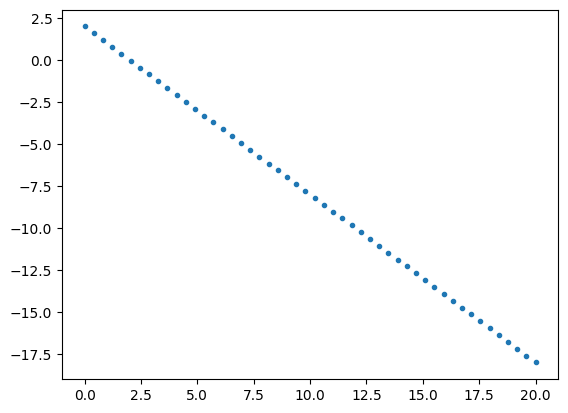

In [37]:
plt.plot(X,y,'.')

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [40]:
def Gd(X,y,alpha,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1=0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        theta_0 =theta_0-(alpha*d_theta_0)
        theta_1 =theta_1-(alpha*d_theta_1)
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

Itrations per Epoch:  65 

Grgint victor:  [[-0.43465438]
 [ 1.24108031]] 

y_predict:  [ -0.04520484  -0.38763135  -0.73005787  -1.07248438  -1.41491089
  -1.7573374   -2.09976391  -2.44219042  -2.78461693  -3.12704345
  -3.46946996  -3.81189647  -4.15432298  -4.49674949  -4.839176
  -5.18160252  -5.52402903  -5.86645554  -6.20888205  -6.55130856
  -6.89373507  -7.23616158  -7.5785881   -7.92101461  -8.26344112
  -8.60586763  -8.94829414  -9.29072065  -9.63314717  -9.97557368
 -10.31800019 -10.6604267  -11.00285321 -11.34527972 -11.68770624
 -12.03013275 -12.37255926 -12.71498577 -13.05741228 -13.39983879
 -13.7422653  -14.08469182 -14.42711833 -14.76954484 -15.11197135
 -15.45439786 -15.79682437 -16.13925089 -16.4816774  -16.82410391] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693

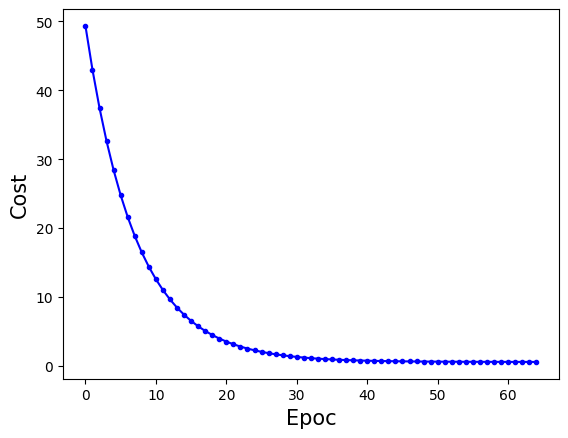

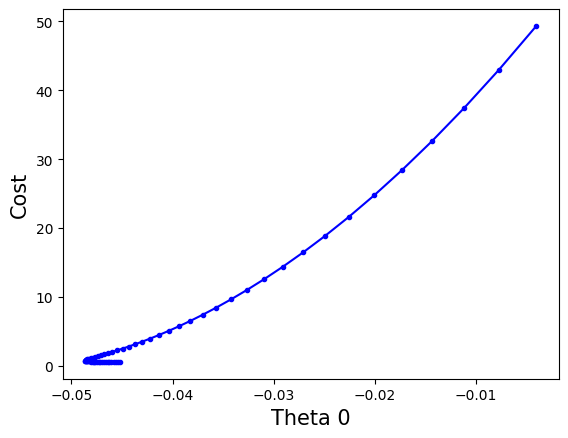

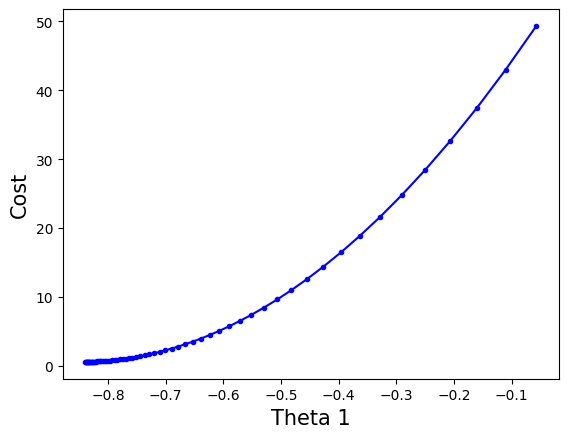

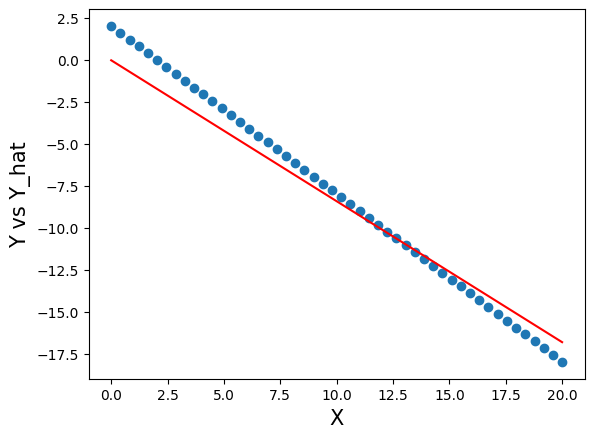

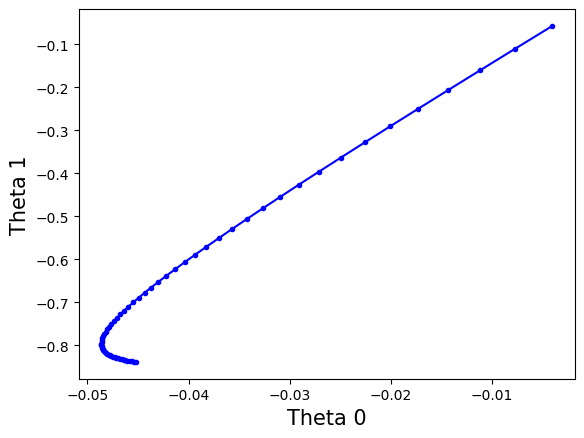

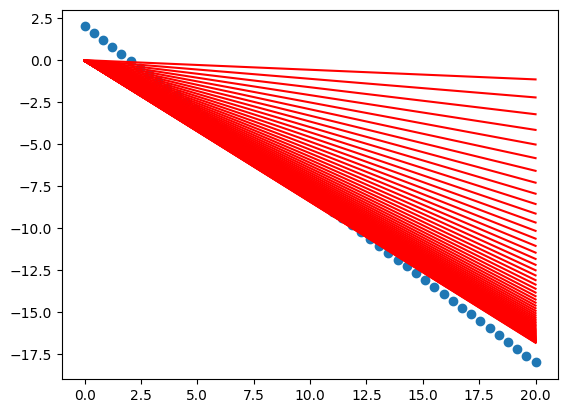

In [41]:
Gd(X,y,.0005,300)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [52]:
def Mo_Gd(X,y,alpha,gama,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1,v0,v1=0,0,0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        v0=(gama*v0)+(alpha*d_theta_0)
        v1=(gama*v1)+(alpha*d_theta_1)
        theta_0 =theta_0-v0
        theta_1 =theta_1-v1
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

Itrations per Epoch:  30 

Grgint victor:  [[-0.47902812]
 [ 0.65086923]] 

y_predict:  [ -0.04735973  -0.39150946  -0.73565919  -1.07980892  -1.42395865
  -1.76810838  -2.11225811  -2.45640784  -2.80055757  -3.1447073
  -3.48885703  -3.83300676  -4.17715649  -4.52130622  -4.86545595
  -5.20960568  -5.55375542  -5.89790515  -6.24205488  -6.58620461
  -6.93035434  -7.27450407  -7.6186538   -7.96280353  -8.30695326
  -8.65110299  -8.99525272  -9.33940245  -9.68355218 -10.02770191
 -10.37185164 -10.71600137 -11.0601511  -11.40430083 -11.74845056
 -12.09260029 -12.43675002 -12.78089975 -13.12504948 -13.46919921
 -13.81334894 -14.15749868 -14.50164841 -14.84579814 -15.18994787
 -15.5340976  -15.87824733 -16.22239706 -16.56654679 -16.91069652] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.3469

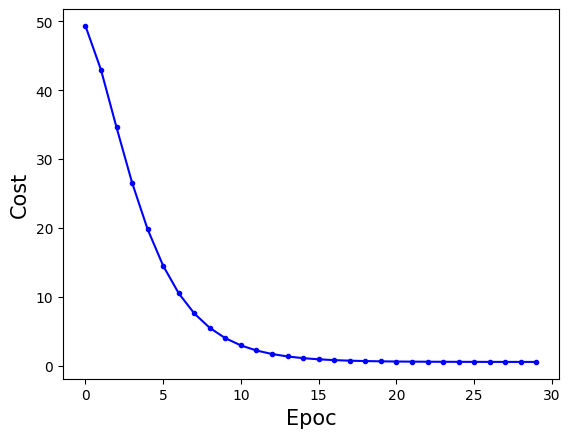

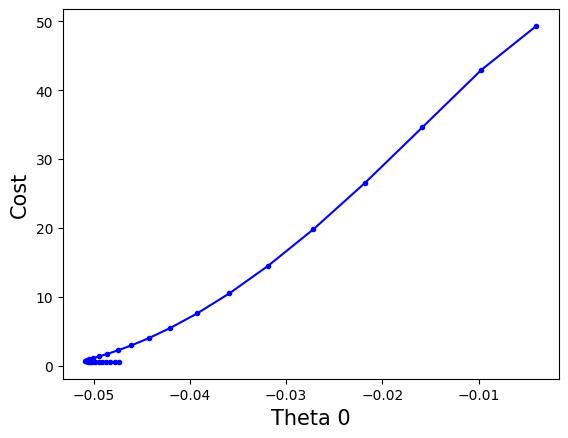

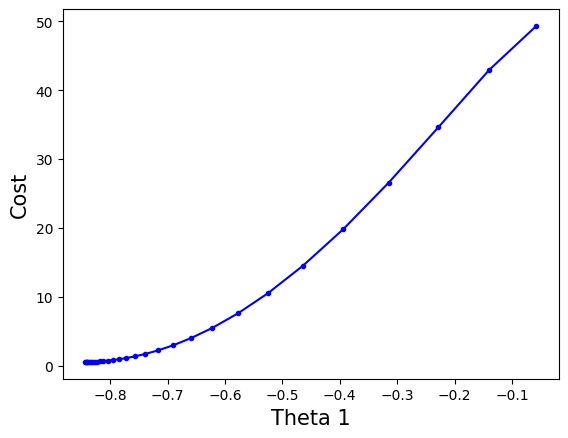

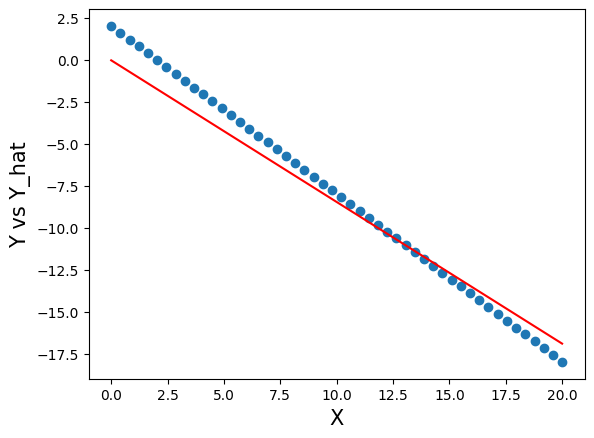

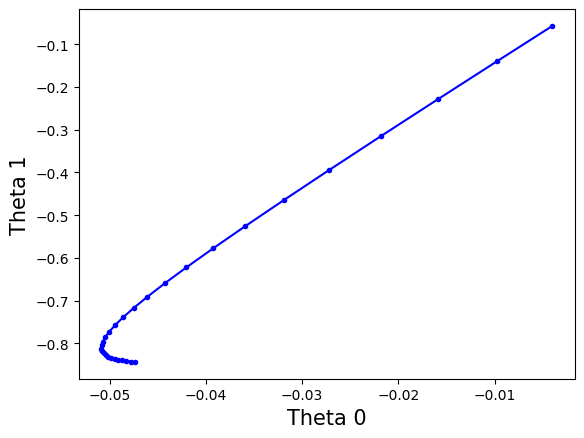

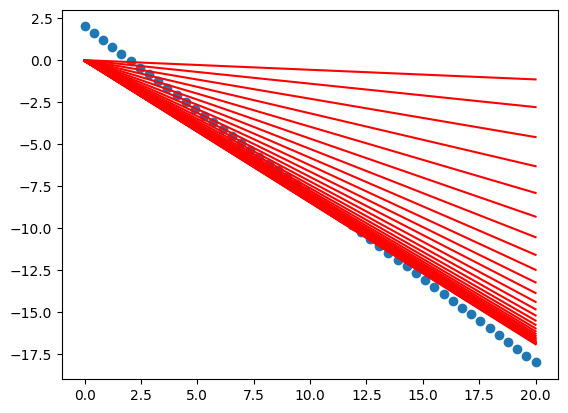

In [55]:
Mo_Gd(X,y,.0005,.5,300)

##### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

Itrations per Epoch:  79 

Grgint victor:  [[-0.51772523]
 [-0.434894  ]] 

y_predict:  [  0.11535974  -0.23701107  -0.58938189  -0.9417527   -1.29412352
  -1.64649433  -1.99886515  -2.35123596  -2.70360678  -3.05597759
  -3.40834841  -3.76071922  -4.11309004  -4.46546085  -4.81783167
  -5.17020248  -5.5225733   -5.87494411  -6.22731493  -6.57968574
  -6.93205656  -7.28442737  -7.63679819  -7.989169    -8.34153982
  -8.69391063  -9.04628145  -9.39865226  -9.75102308 -10.1033939
 -10.45576471 -10.80813553 -11.16050634 -11.51287716 -11.86524797
 -12.21761879 -12.5699896  -12.92236042 -13.27473123 -13.62710205
 -13.97947286 -14.33184368 -14.68421449 -15.03658531 -15.38895612
 -15.74132694 -16.09369775 -16.44606857 -16.79843938 -17.1508102 ] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.3469

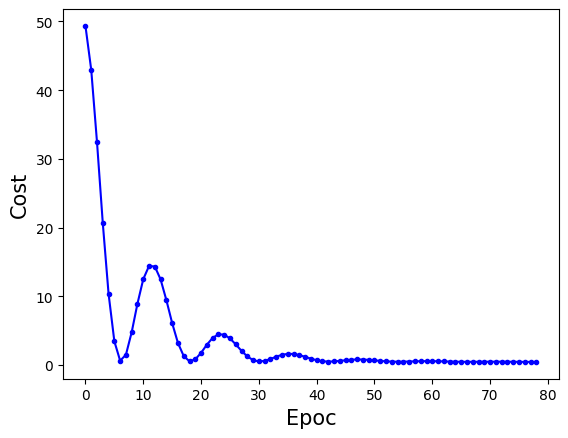

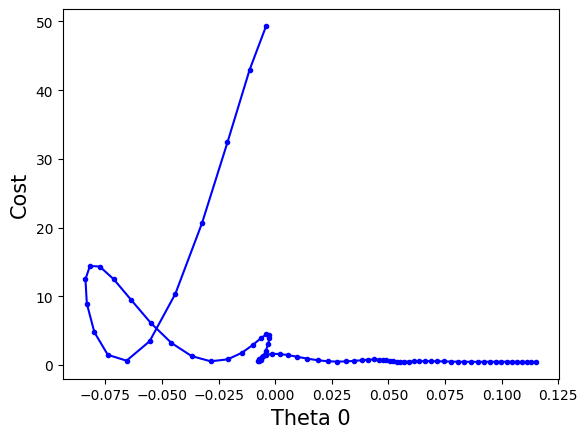

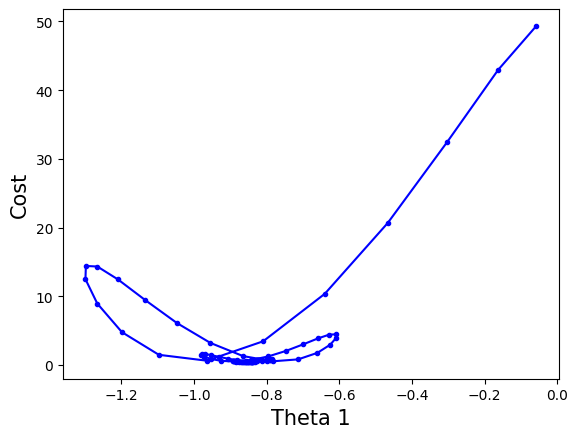

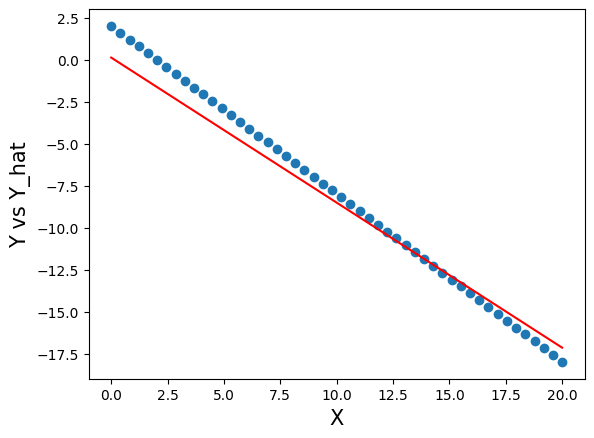

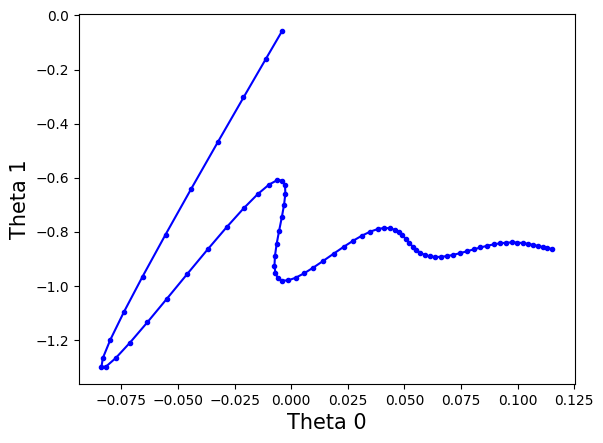

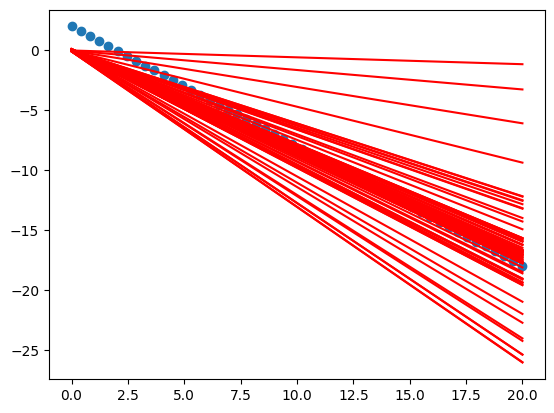

In [56]:
Mo_Gd(X,y,.0005,.9,300)

### Do not forget:

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [57]:
def NAG_Gd(X,y,alpha,gama,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1,v0,v1=0,0,0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        v0=(gama*v0)+(alpha*d_theta_0)
        v1=(gama*v1)+(alpha*d_theta_1)
        theta_0t=theta_0-gama*v0
        theta_1t=theta_1-gama*v1
        theta_0 =theta_0t-(alpha*d_theta_0)
        theta_1 =theta_1t-(alpha*d_theta_1)
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

Itrations per Epoch:  43 

Grgint victor:  [[-0.47342316]
 [ 0.4639664 ]] 

y_predict:  [  0.02827272  -0.31873527  -0.66574327  -1.01275126  -1.35975926
  -1.70676725  -2.05377525  -2.40078324  -2.74779124  -3.09479923
  -3.44180723  -3.78881522  -4.13582322  -4.48283121  -4.82983921
  -5.1768472   -5.5238552   -5.87086319  -6.21787119  -6.56487918
  -6.91188718  -7.25889517  -7.60590317  -7.95291116  -8.29991916
  -8.64692715  -8.99393515  -9.34094314  -9.68795114 -10.03495913
 -10.38196713 -10.72897512 -11.07598312 -11.42299111 -11.76999911
 -12.1170071  -12.4640151  -12.81102309 -13.15803109 -13.50503908
 -13.85204708 -14.19905507 -14.54606307 -14.89307106 -15.24007906
 -15.58708705 -15.93409505 -16.28110304 -16.62811104 -16.97511903] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.346

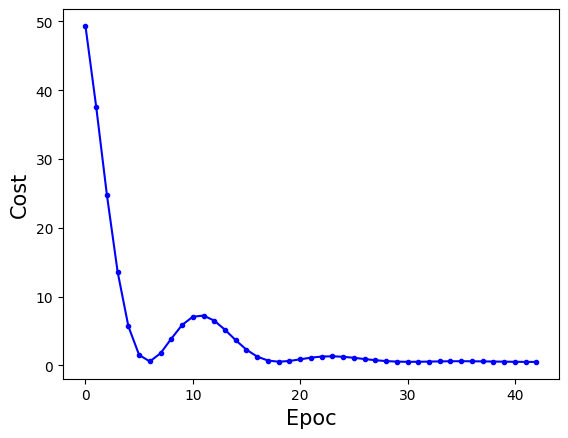

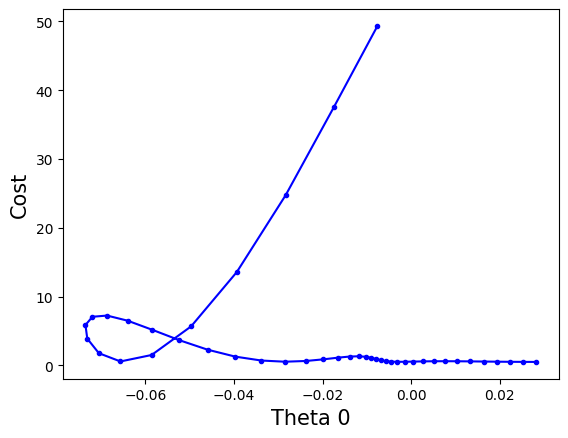

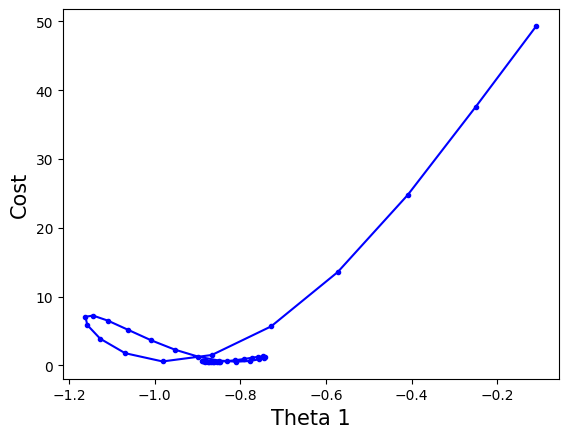

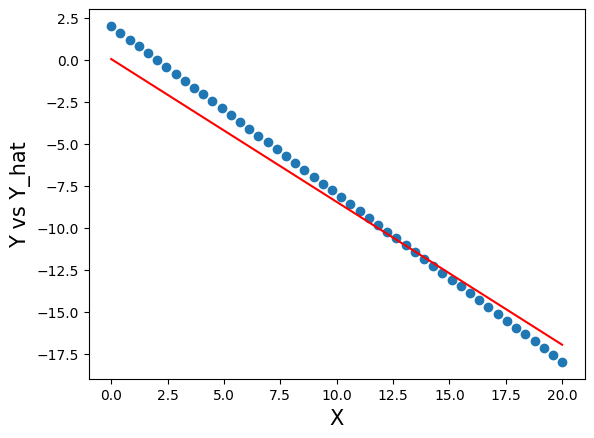

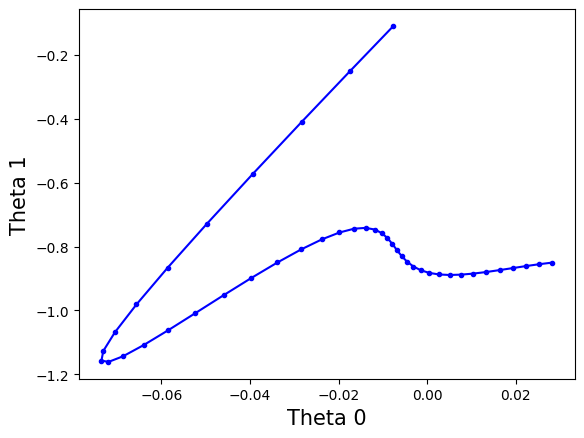

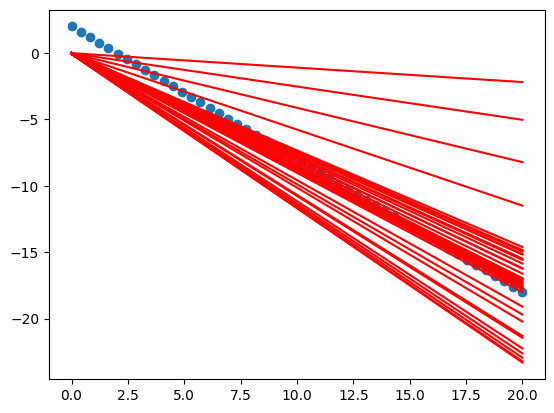

In [58]:
NAG_Gd(X,y,.0005,.9,300)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

Itrations per Epoch:  31 

Grgint victor:  [[-0.58366404]
 [-0.90067484]] 

y_predict:  [-6.38350774e-03 -3.56476591e-01 -7.06569673e-01 -1.05666276e+00
 -1.40675584e+00 -1.75684892e+00 -2.10694200e+00 -2.45703509e+00
 -2.80712817e+00 -3.15722125e+00 -3.50731434e+00 -3.85740742e+00
 -4.20750050e+00 -4.55759358e+00 -4.90768667e+00 -5.25777975e+00
 -5.60787283e+00 -5.95796591e+00 -6.30805900e+00 -6.65815208e+00
 -7.00824516e+00 -7.35833825e+00 -7.70843133e+00 -8.05852441e+00
 -8.40861749e+00 -8.75871058e+00 -9.10880366e+00 -9.45889674e+00
 -9.80898983e+00 -1.01590829e+01 -1.05091760e+01 -1.08592691e+01
 -1.12093622e+01 -1.15594552e+01 -1.19095483e+01 -1.22596414e+01
 -1.26097345e+01 -1.29598276e+01 -1.33099207e+01 -1.36600137e+01
 -1.40101068e+01 -1.43601999e+01 -1.47102930e+01 -1.50603861e+01
 -1.54104791e+01 -1.57605722e+01 -1.61106653e+01 -1.64607584e+01
 -1.68108515e+01 -1.71609446e+01] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959

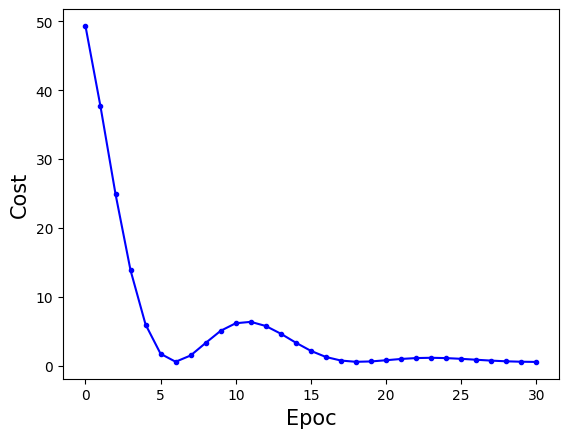

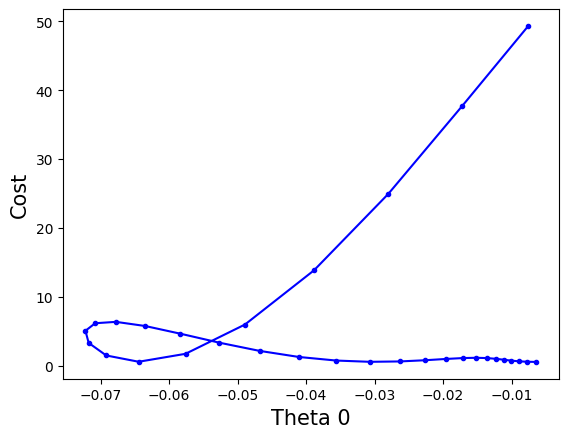

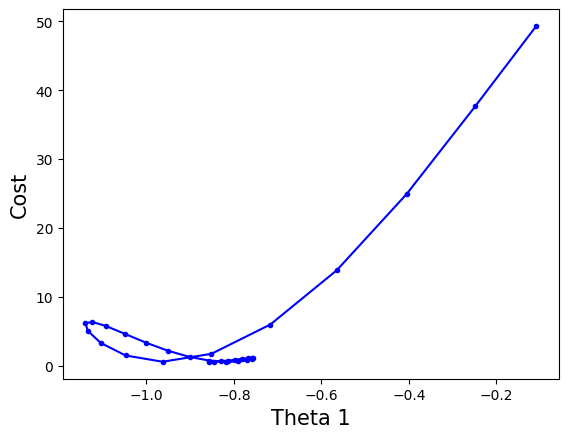

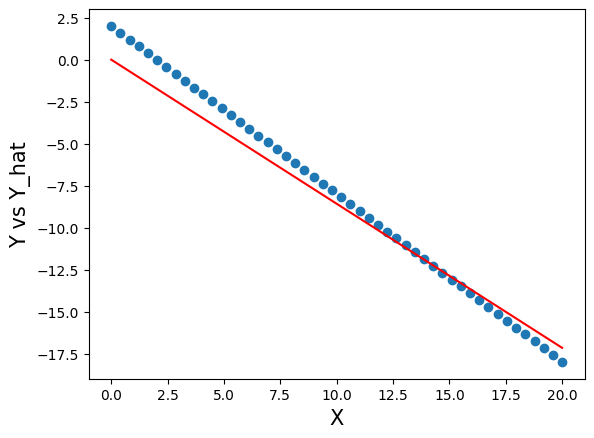

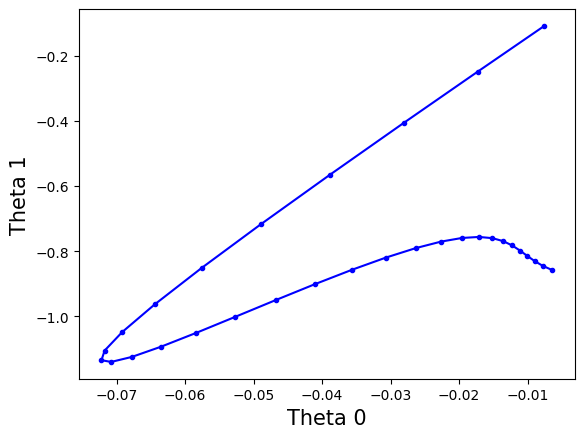

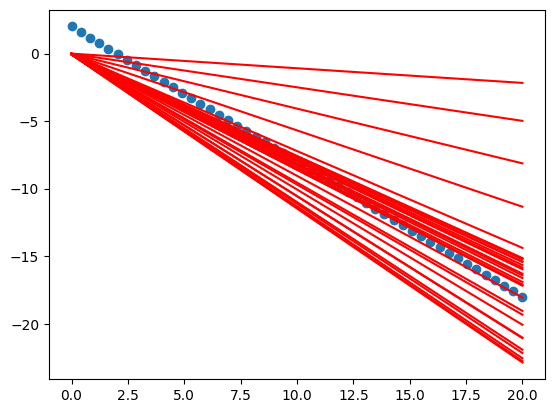

In [59]:
NAG_Gd(X,y,.0005,.89,300)